## 1. Load libraries

In [ ]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from google.colab import drive
import joblib

## 2. Load data

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Đọc dữ liệu
df = pd.read_csv('/content/gdrive/MyDrive/Khóa luân 2024 (Nguyễn Tiến Anh QUân)/Dữ liệu/VCI.csv')


## 3. Preprocess data

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df.sort_values(by='Date', inplace=True)
data = df[['Closing Price']].values

In [ ]:
# Chọn các đặc trưng và mục tiêu
X = df[['Highest Price', 'Lowest Price', 'Opening Price']].values  # input
Y = df[['Closing Price']].values  # output


In [ ]:
# Chia dữ liệu thành 3 tập: train, validation, test
train_size = int(len(X) * 0.7)
val_size = int(len(X) * 0.15)
X_train, X_val, X_test = X[:train_size], X[train_size:train_size + val_size], X[train_size + val_size:]
y_train, y_val, y_test = Y[:train_size], Y[train_size:train_size + val_size], Y[train_size + val_size:]


In [ ]:
# Chuẩn hóa dữ liệu
scaler_X = MinMaxScaler(feature_range=(0, 1))
scaler_Y = MinMaxScaler(feature_range=(0, 1))

In [ ]:
X_train_scaled = scaler_X.fit_transform(X_train)
X_val_scaled = scaler_X.transform(X_val)
X_test_scaled = scaler_X.transform(X_test)

y_train_scaled = scaler_Y.fit_transform(y_train)
y_val_scaled = scaler_Y.transform(y_val)
y_test_scaled = scaler_Y.transform(y_test)

## 4. Train model

In [ ]:
# Khởi tạo và huấn luyện mô hình Linear Regression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In [ ]:
# Khởi tạo và huấn luyện mô hình Linear Regression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
# Biến để theo dõi loss tốt nhất
best_loss = float('inf')

# Train mô hình qua nhiều vòng lặp (nếu cần)
for epoch in range(50):  # Giả lập quá trình "epoch"
    model.fit(X_train_scaled, y_train_scaled)  # Huấn luyện mô hình

    # Dự đoán trên tập validation
    y_pred = model.predict(X_val)

    # Tính loss (Mean Squared Error)
    val_loss = mean_squared_error(y_val, y_pred)

    print(f"Epoch {epoch + 1}: Validation Loss = {val_loss:.4f}")

    # Lưu mô hình nếu loss cải thiện
    if val_loss < best_loss:
        best_loss = val_loss
        joblib.dump(model, '/content/gdrive/MyDrive/Khóa luân 2024 (Nguyễn Tiến Anh QUân)/allsavemodel/savemodelLN/save_model.keras')  # Lưu mô hình tốt nhất
        print(">> Model saved!")

# Load lại mô hình tốt nhất
best_model = joblib.load('/content/gdrive/MyDrive/Khóa luân 2024 (Nguyễn Tiến Anh QUân)/allsavemodel/savemodelLN/save_model.keras')

Epoch 1: Validation Loss = 0.2590
>> Model saved!
Epoch 2: Validation Loss = 0.2590
Epoch 3: Validation Loss = 0.2590
Epoch 4: Validation Loss = 0.2590
Epoch 5: Validation Loss = 0.2590
Epoch 6: Validation Loss = 0.2590
Epoch 7: Validation Loss = 0.2590
Epoch 8: Validation Loss = 0.2590
Epoch 9: Validation Loss = 0.2590
Epoch 10: Validation Loss = 0.2590
Epoch 11: Validation Loss = 0.2590
Epoch 12: Validation Loss = 0.2590
Epoch 13: Validation Loss = 0.2590
Epoch 14: Validation Loss = 0.2590
Epoch 15: Validation Loss = 0.2590
Epoch 16: Validation Loss = 0.2590
Epoch 17: Validation Loss = 0.2590
Epoch 18: Validation Loss = 0.2590
Epoch 19: Validation Loss = 0.2590
Epoch 20: Validation Loss = 0.2590
Epoch 21: Validation Loss = 0.2590
Epoch 22: Validation Loss = 0.2590
Epoch 23: Validation Loss = 0.2590
Epoch 24: Validation Loss = 0.2590
Epoch 25: Validation Loss = 0.2590
Epoch 26: Validation Loss = 0.2590
Epoch 27: Validation Loss = 0.2590
Epoch 28: Validation Loss = 0.2590
Epoch 29: Val

In [ ]:
# Dự đoán giá trị
y_pred_scaled = model.predict(X_test_scaled)

In [ ]:
# Chuyển giá trị dự đoán về giá trị gốc (trước khi chuẩn hóa)
y_pred = scaler_Y.inverse_transform(y_pred_scaled)
y_test_actual = scaler_Y.inverse_transform(y_test_scaled)

## 5. Visualize results

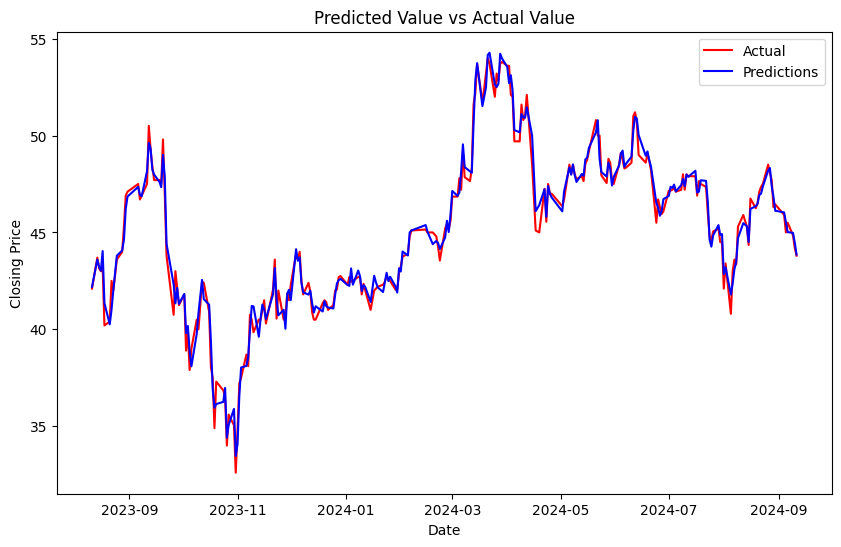

In [ ]:
# Vẽ đồ thị
plt.figure(figsize=(10,6))
#plt.plot(df['Date'][:train_size], train_Y, label='Train Actual')
#plt.plot(df['Date'][train_size:train_size+val_size], val_Y, label='Validation Actual')
plt.plot(df['Date'][train_size+val_size:], y_test_actual, label='Actual',color='red')
#plt.plot(df['Date'][:train_size], train_predictions, label='Train Predictions')
#plt.plot(df['Date'][train_size:train_size+val_size], val_predictions, label='Validation Predictions')
plt.plot(df['Date'][train_size+val_size:], y_pred, label='Predictions',color='blue')

plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Predicted Value vs Actual Value')
plt.legend()
plt.show()

## 6. Model accuracy

In [ ]:
# Đánh giá mô hình
print("MAE:", mean_absolute_error(y_test_actual, y_pred))
print("MSE:", mean_squared_error(y_test_actual, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test_actual, y_pred)))
print("R2 Score:", r2_score(y_test_actual, y_pred))

MAE: 0.39334533131378335
MSE: 0.2719071843912656
RMSE: 0.5214472019210245
R2 Score: 0.9839515739491248


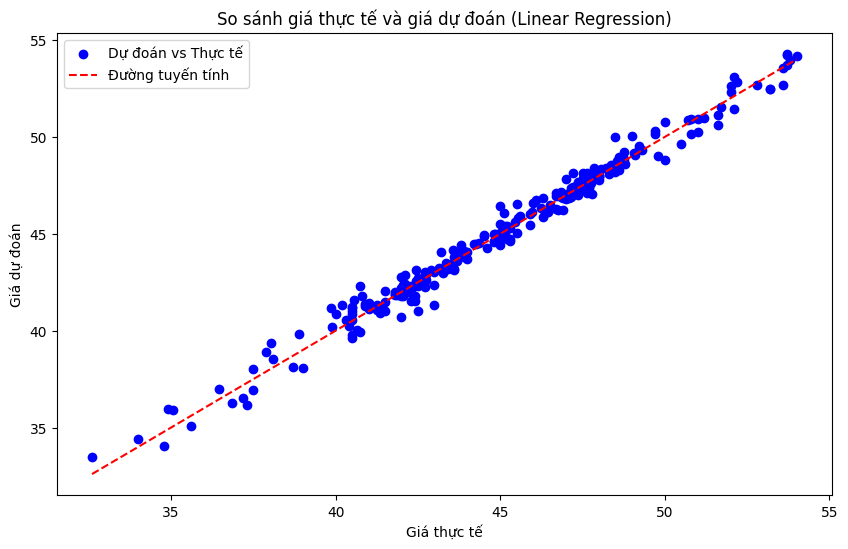

In [ ]:
# Vẽ đồ thị giữa giá thực tế và giá dự đoán
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Dự đoán vs Thực tế')

# Vẽ đường thẳng biểu thị sự tuyến tính
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Đường tuyến tính')

plt.title('So sánh giá thực tế và giá dự đoán (Linear Regression)')
plt.xlabel('Giá thực tế')
plt.ylabel('Giá dự đoán')
plt.legend()
plt.show()

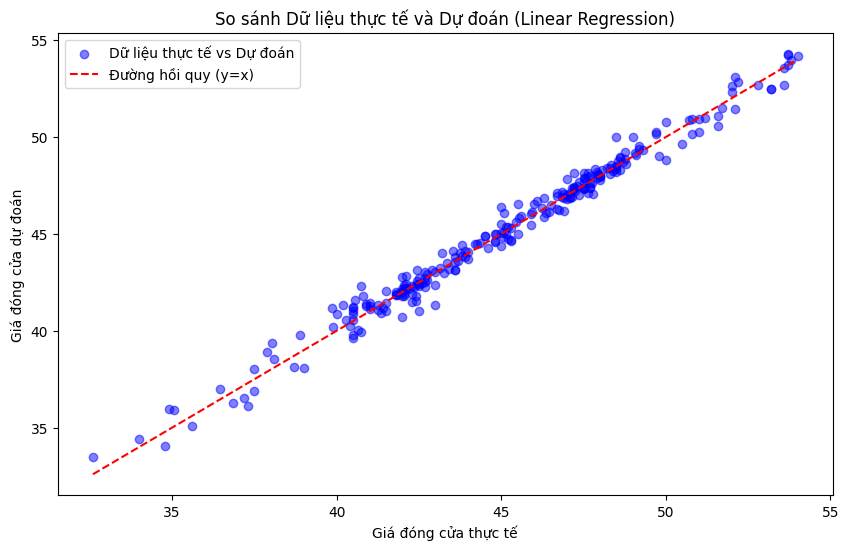

In [ ]:
# Vẽ biểu đồ phân tán giữa giá thực tế và giá dự đoán
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Dữ liệu thực tế vs Dự đoán')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Đường hồi quy (y=x)')
plt.title('So sánh Dữ liệu thực tế và Dự đoán (Linear Regression)')
plt.xlabel('Giá đóng cửa thực tế')
plt.ylabel('Giá đóng cửa dự đoán')
plt.legend()
plt.show()